# Work Description

In this notebook, we will discover the dataset and set our Machine learning problem.

# Dataset Description
The dataset is made available on Kaggle by Tanmay Nema, vedarth kumtekar. (2023) [Classifying Customers into Segments](https://www.kaggle.com/competitions/classifying-customers-into-segments/overview) .The following are the composition of Data for the Competition:
- Training Dataset (train.csv)
- Testing Dataset (test.csv)

The Datasets is composed for the below list of columns:
  - ID: Unique ID
  - Gender: Gender of the customer
  - Ever_Married: Marital status of the customer
  - Age: Age of the customer
  - Graduated: Is the customer a graduate?
  - Profession: Profession of the customer
  - Work_Experience: Work Experience in years
  - Spending_Score: Spending score of the customer
  - Family_Size: Number of family members for the customer (including the customer)
  - Var_1: Anonymised Category for the customer
  - Segmentation: Target -> Customer Segment of the customer

### Machine learning problem setup

Based on the description provided above, the competition is focused on a supervised machine learning problem : classification problem rather than clustering. Here's the key points :

- **Target Variable ("Segmentation")**: The presence of a target variable named "Segmentation" suggests that this is a supervised learning problem where the goal is to predict predefined customer segments.

- **Evaluation**: The evaluation is described as comparing the submitted predictions on the testing dataset with the observed target for the testing data. This implies that there are known segments (labels) for the testing data, and the task is to predict these segments accurately.

Hence, the problem we will study in this notebook is about training a machine learning model to classify customers into existing segments based on the provided features. The objective is to build a classification model that can accurately assign customers to their respective segments as specified in the "Segmentation" target variable.

# Work plan
To structure this notebook, we initially followed standard procedures for data exploration, analysis, and modeling tailored to address multi-class classification challenges. Subsequently, we iteratively refined our approach based on the insights gained and findings from our analysis. The finalized plan of our work is outlined as follows:

1. Data Loading and Description: loading the dataset from (train, test) files and getting an overview of the main characteristics.

2. Exploratory Data Analysis:
  - Conduct univariate analysis to understand the distribution of individual features.
  - Perform bivariate and multivariate analysis to uncover relationships and interactions between variables.

3. In-Depth Analysis of Missing Data: Investigate missing data patterns and their potential implications on the analysis.

4. Data Preprocessing for Training: Prepare the dataset for model training by handling missing values, encoding categorical variables, and scaling features as necessary.

5. Model Evaluation with ML Models: Evaluate the performance of various machine learning models on the dataset using appropriate metrics and techniques.

6. Clustering and Re-segmentation Analysis: Explore clustering techniques to re-segment the data and assess the effectiveness of alternative segmentation approaches.

7. Conclusion and Future Improvements: Summarize key findings, draw conclusions from the analysis, and propose potential avenues for further research and improvement.

In this Part 1 of the project, we will focus on the 3 first setps. We are looking to deeply understand the dataset, uncover its caracteristics and understand the relationships between the different variables.


In [69]:
from __future__ import absolute_import, print_function, division
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
clear_output(wait=True)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as mno
from scipy import stats
import gc
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import IterativeImputer, SimpleImputer


sns.set_theme(style="whitegrid", palette="Set2")
%matplotlib inline


# Task 1. Loading and describing the data

### 1.1 Loading and describing the training data

Reading the data from my Drive using Google drive

In [3]:
train = pd.read_csv('./data/Train.csv', encoding="ISO-8859-1")

In [4]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


From the above tables, we can notice that :
- Many columns have missing data (6 out of 10)
- Most of the columns (6 out of 10) represent qualitative variables a.k.a categorical ones.
- The customer ID is an integer used as a reference identifier, not as a meaningful numerical value.

In [6]:
train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

The above table of missing data asserts our previous observation. Multiple features in our dataset have missing values. The level of missingness varies across the features. We will dedicate a section for a deeper analysis of these missing data. First, we must further explore our dataset and understand its features.

In [7]:
#describing numerical columns
train.drop('ID', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.0,1.0,4.0,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.0,3.0,4.0,9.0


By checking the above table, we didn't notice extreme values for the numerical variables (Age, Work_Experience, Family_Size)

In [8]:
#describing categorical columns
train.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [9]:
train['Segmentation'].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

We can notice that :
- There is 3 binary columns.
- The cadinality of 'Profession' and 'Var_1' are relatively moderate
- Our target column 'Segmentation' is multi-class : 4 values

##### Check duplicated rows

In [10]:
train.duplicated().sum()

0

##### Checking duplication of Customers *ID*

In [11]:
len(train.ID.unique()) == train.shape[0]

True

No duplicated rows. Each row stands for a uniquely represented Customer in the dataset.

## 1.2 Loading and describing the testing data

In [12]:
#Reading the data
#ID+Featues
test = pd.read_csv('./data/Test.csv', encoding="ISO-8859-1")
#ID + Segmentation
submission = pd.read_csv('./data/sample_submission.csv', encoding="ISO-8859-1")

In [13]:
# Merge the datasets on the 'ID' column to ensure data integraty
test= pd.merge(test, submission, on='ID')

In [14]:
# inspecting the merged dataset and get test data infos
print("\nMerged Test Data Info:")
print(test.info())
test.head()


Merged Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB
None


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,A
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,A
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [15]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

The testing dataset, much like the training dataset, contains missing values spread across various columns. The proportions of missing data in the testing set are quite similar to those observed in the training set, indicating a consistent pattern of missingness.

In [16]:
test.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,2627,2577,2603,2589,2627,2595,2627
unique,2,2,2,9,3,7,1
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,1424,1520,1602,802,1616,1672,2627


In [17]:
test['Segmentation'].value_counts()

Segmentation
A    2627
Name: count, dtype: int64

**Interpretation of the Finding**
The main observation that we can draw is that the testing data contains only one class of customer segment ('A')! This is can have has several important implications for our experimentations and model evaluation:

* **Class Imbalance**: The testing data is heavily imbalanced, with only one class ('A') represented. This is a significant deviation from a balanced dataset where all classes are expected to be present.
* **Model Evaluation Bias**: Evaluating our model's performance on this testing dataset will not provide a comprehensive view of its ability to discriminate between different classes. The model will only be tested on its ability to predict the 'A' class correctly, which is not representative of a real-world scenario where multiple classes exist.

Since the testing data lacks diversity in the target variable, it will not help in assessing the model's generalization ability across all customer segments. **We need a testing dataset that represents all classes proportionally.** Thus, we decided to merge all the provided data and create a new split of this data into Training and testing sets.  create a testing dataset that maintains the same class distribution as the training dataset. This will provide a more realistic evaluation of model performance.

## 1.3 Creating a new split of data

In [18]:
# Combine train and test data
combined_data = pd.concat([train, test], ignore_index=True)
print(combined_data.shape)

(10695, 11)


In [19]:
#Checking if the merging have introduced data duplication
print("Duplicated data: ",combined_data.duplicated().sum())

Duplicated data:  24


In [20]:
#Dropping the duplicated examples
combined_data.drop_duplicates(inplace=True)

To simulate real-world scenarios where class distributions may differ between training and test datasets, we use a random split instead of a stratified split of the combined dataset. This method does not ensure that the class proportions in the training and test sets will be identical, but it guarantees that all classes are present in both sets.

In [25]:
#Creating a random split of the data
target='Segmentation'
#Shuffling the data before splitting
shuffled_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)
# Perform a random split of the data
train, test = train_test_split(combined_data, test_size=0.25, random_state=42)
train.shape, test.shape

((8003, 11), (2668, 11))

In [26]:
print("Train data tartget class ditribution: \n ", train[target].value_counts())
print("\n Test data tartget class ditribution: \n ", test[target].value_counts())

Train data tartget class ditribution: 
  Segmentation
A    3433
D    1705
C    1496
B    1369
Name: count, dtype: int64

 Test data tartget class ditribution: 
  Segmentation
A    1142
D     563
B     489
C     474
Name: count, dtype: int64


In [27]:
print("Missing data in train set:\n", train.isna().sum() )
print("\n\n Missing data in test set:\n", test.isna().sum() )

Missing data in train set:
 ID                   0
Gender               0
Ever_Married       134
Age                  0
Graduated           74
Profession         127
Work_Experience    803
Spending_Score       0
Family_Size        337
Var_1               81
Segmentation         0
dtype: int64


 Missing data in test set:
 ID                   0
Gender               0
Ever_Married        53
Age                  0
Graduated           28
Profession          34
Work_Experience    291
Spending_Score       0
Family_Size        108
Var_1               26
Segmentation         0
dtype: int64


Next, we will conduct an exploratory data analysis (EDA) on our training data. The testing data will be reserved for evaluating the performance of our classification models.

In [28]:
# Reset the index of the train and test datasets
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

#### Saving the new datasets for future use and cleaning the memory

In [29]:
train.to_csv('./data/new_train.csv', index=False, sep=';', header=True, encoding='utf-8')
test.to_csv('./data/new_test.csv', index=False, sep=';', header=True, encoding='utf-8')

In [30]:
del combined_data
gc.collect()

490

# Task.2 Exploratory data Analysis

In [31]:
#Creating different sets of columns based on their type and role
cat_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
num_columns = ['Age', 'Work_Experience', 'Family_Size']

### 2.1 Univariate analysis of our target variable 'Segmentation'

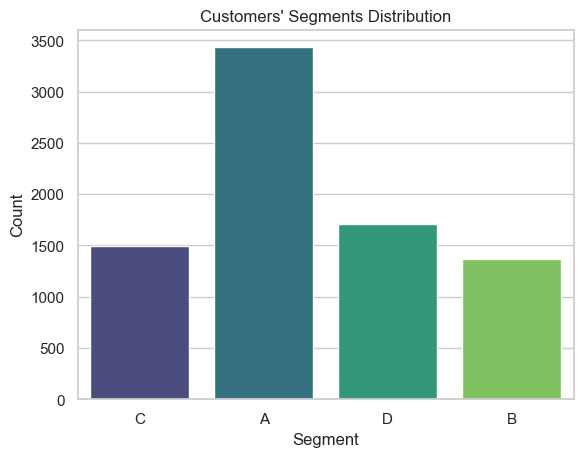

In [32]:
# Displaying the distribution of customers across the Segment
sns.countplot(data=train, x=target, palette='viridis')
plt.title("Customers' Segments Distribution")
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

In [33]:
segmentation=train[target].value_counts().reset_index()
segmentation

,Segmentation,count
0,A,3433
1,D,1705
2,C,1496
3,B,1369


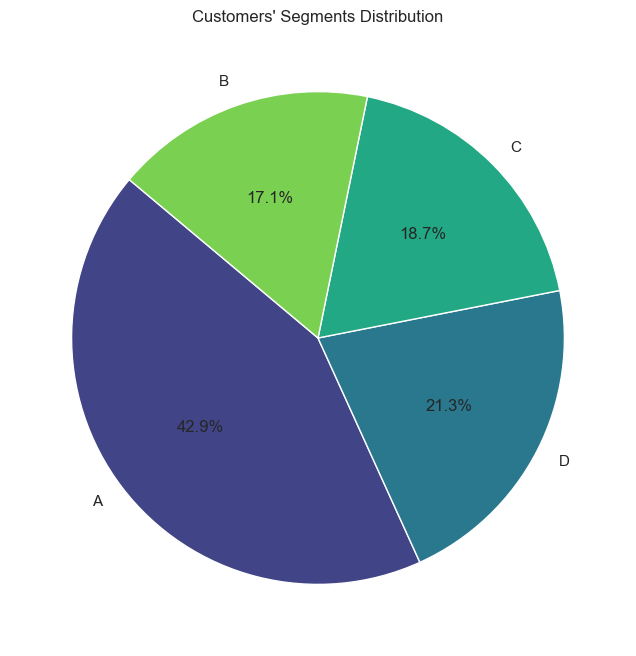

In [34]:
# Pie chart

plt.figure(figsize=(8, 8))
plt.pie(segmentation['count'], labels=segmentation['Segmentation'], colors=sns.color_palette('viridis', segmentation.shape[0]), autopct='%1.1f%%', startangle=140)
plt.title("Customers' Segments Distribution")
plt.show()

From the above plots, we can notice that there is 4 different segments of customers in the training dataset: A, B, C and D. The largest and dominant segment is 'A'. It represents approximately 42.9% of the total customer base.  The class distribution indicates a moderate imbalance among the classes. Class A is over twice as prevalent as the least frequent class, Class B.

=> This imbalance could affect the performance of our classification models, particularly in their ability to correctly classify the less represented classes. To address this, we may consider techniques such as oversampling the minority classes, undersampling the majority class, or applying class weight adjustments during model training.

### 2.2 Univariate analysis of Categorical and Numerical features

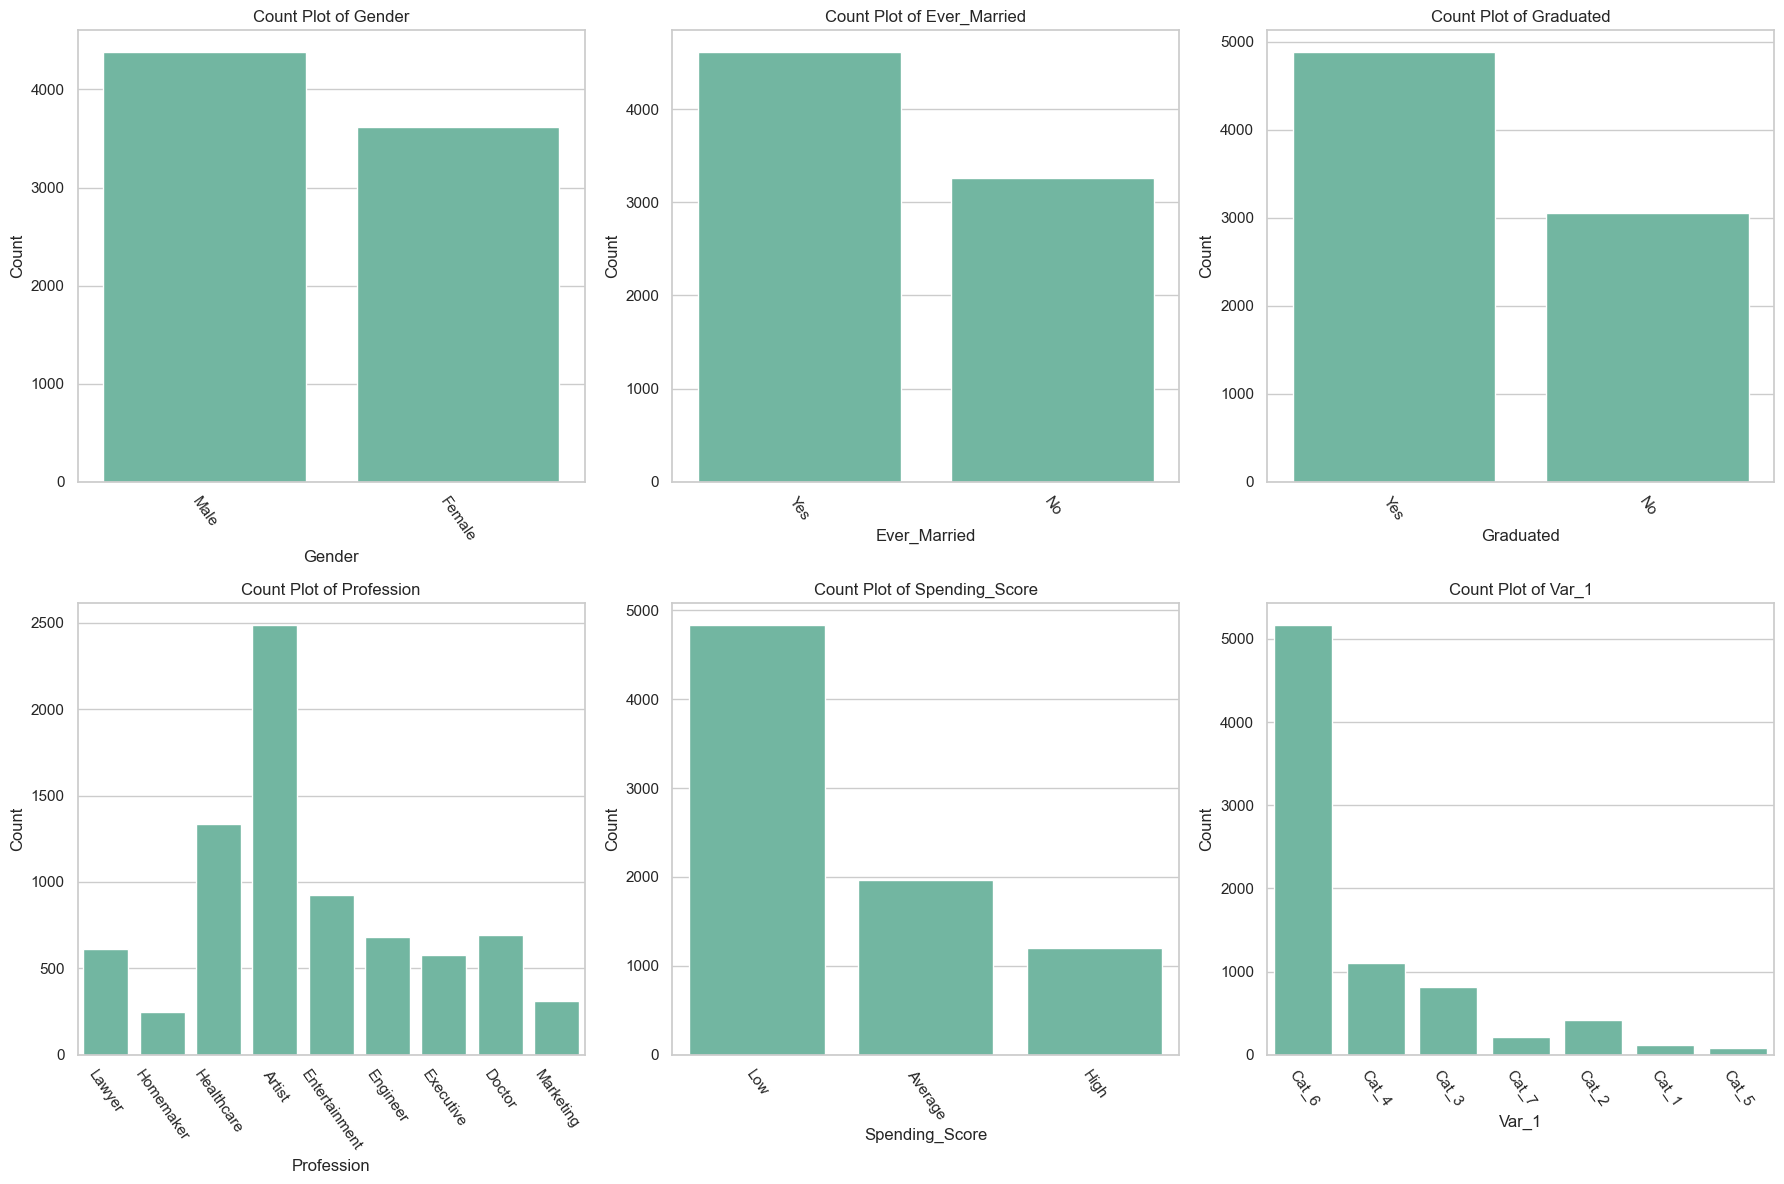

In [35]:
# Displaying the values of the different categorical features as a Grid
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = -55)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

From the univariate analysis of categorical features plotted in the above figure, we can make the following key observations:
- Gender Distribution: The majority of customers are male, but there is only a slight difference in the number of female customers in the dataset. This indicates a relatively balanced gender distribution.
- Marital Status (Ever_Married): A significant portion of the customers are married. We also observe the absence of other common situations, such as being in a couple without being officially married.
- Graduation Status: More customers have graduated compared to those who have not, indicating a relatively educated customer base.
- Profession: The 'Artist' profession has the highest count among customers, followed by 'Healthcare' and 'Entertainment'. There is a significant gap between customer profession categories, with a dominance of the 'Artist' category. Professions like 'Executive', 'Marketing', and particularly 'Homemaker' have relatively lower counts. We also notice the absence of special cases like 'unemployment' or 'retired'.
- Spending Score: This is an ordinal feature. The majority of customers have a 'Low' spending score, with fewer customers in the 'Average' and 'High' spending score categories. This suggests that most customers might be more conservative in their spending.
- Var_1: The 'Cat_6' category dominates, indicating it is the most common category for this variable. The other categories are much less frequent. This suggests an imbalance in the customer base regarding this anonymized feature.

These observations provide valuable insights into the demographic and spending characteristics of the customer base, which can be crucial for understanding customer segmentation and effectively targeting marketing strategies.

* **Displaying the distribution of the different numerical features**


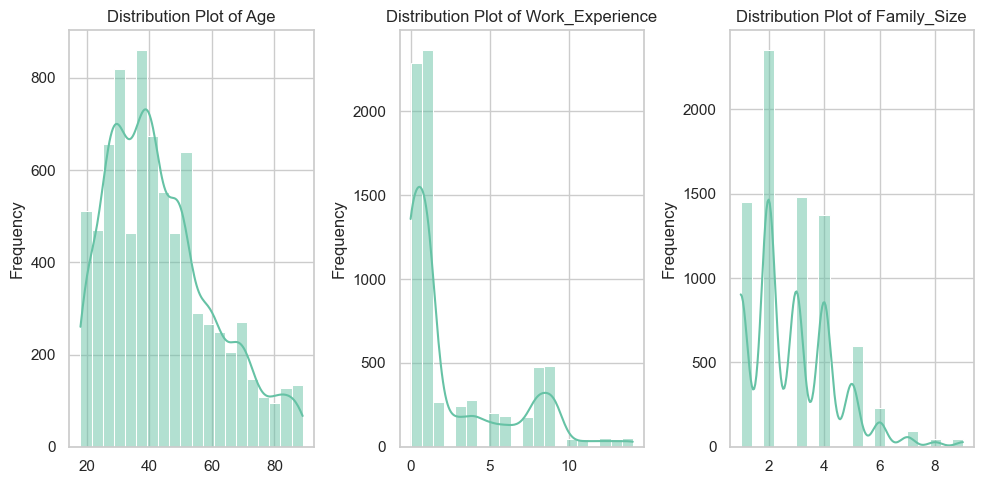

In [36]:
# Histogram plot of the distribution of the different numerical features as a Grid
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))

axes = axes.flatten()
for i, col in enumerate(num_columns):
    sns.histplot(train[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

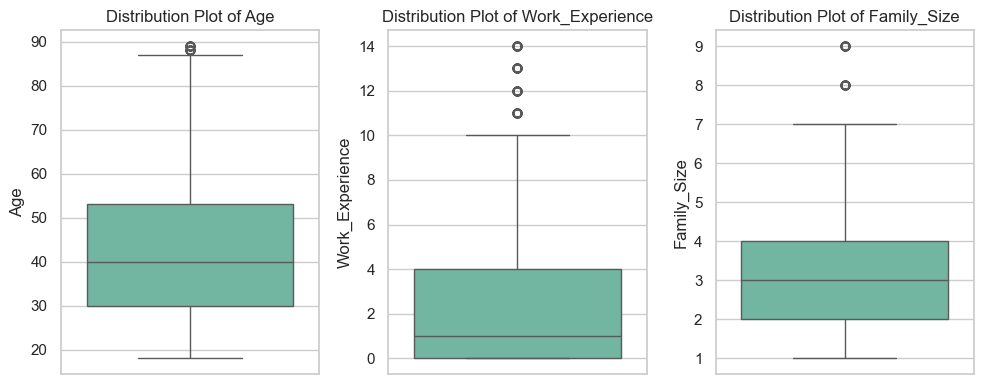

In [37]:
# Boxplot of the different numerical features as a Grid, to check if there is outliers
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(train[col], ax=axes[i])
    axes[i].set_title(f'Distribution Plot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

From the univariate analysis of categorical features plotted in the above figure, we can make the following key observations:
- Age: The median age of customers is around 40 years with a concentration of customers from 30 to 50 years. The age distribution is fairly spread out, with ages ranging from the early 20s to around 90 years. There are a few outliers above 80 years old.
- Work Experience: The median work experience is approximately 2 years. The majority of customers have a work experience ranging between 0 and 4 years, with several outliers extending up to 14 years. The distribution is right-skewed, indicating that more customers have lower work experience while fewer have higher experience. Overall, the work experience values in the dataset are relatively low compared to real-world expectations, which may suggest that customers could have inaccurately reported their actual work experience.
- Family Size: The median family size is around 3 members. Most customers have a small family size ranging from 2 to 4 members.There are a few outliers with family sizes of 7, 8, and 9 members. The distribution is relatively balanced, with the IQR spanning from 2 to 4 members.

## 2.3. Bi-variate and Multi-variate analysis of the features



* Descriptive Analysis of Customer Segments: Age, Work Experience, and Family Size Distribution

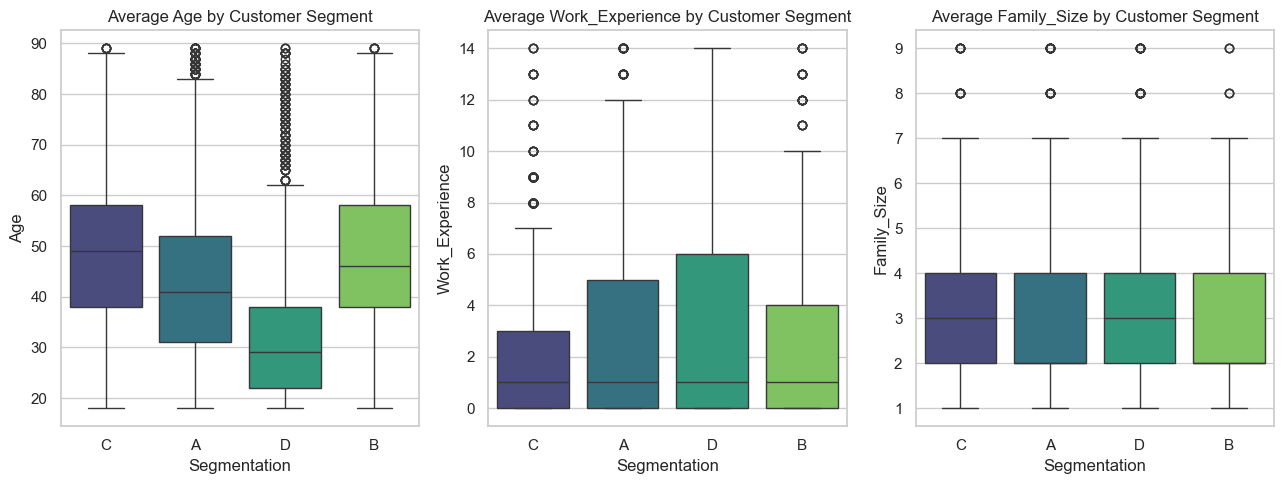

In [38]:
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 5))

axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(x=target, y=train[col], data=train, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {col} by Customer Segment')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Descriptive Analysis of Customer Segments: Gender, Graduation, and Marital status  Distribution

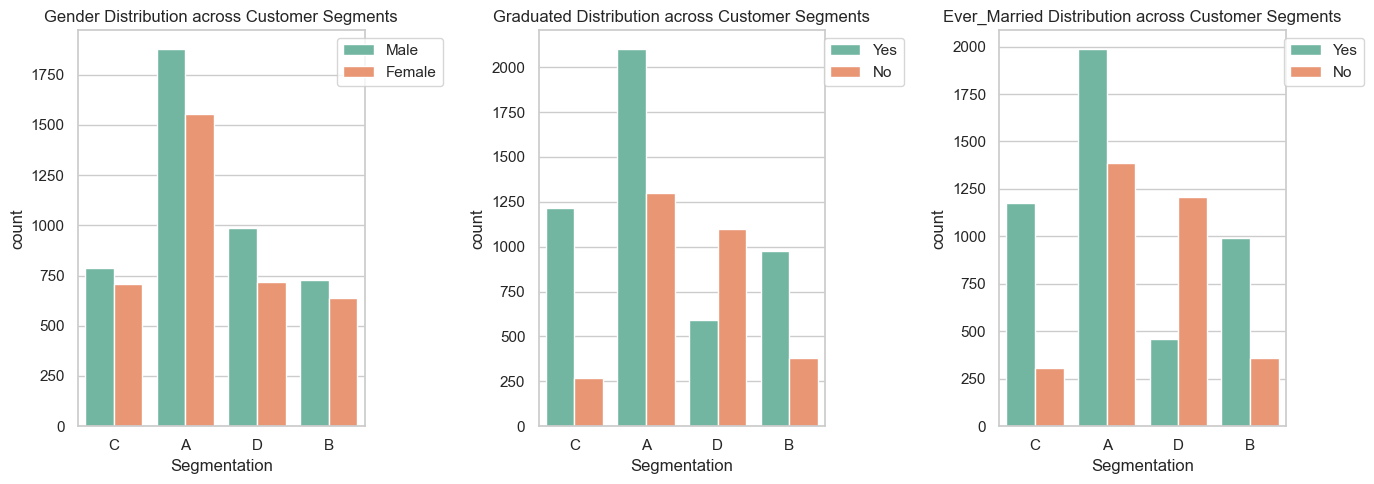

In [39]:
binary_colum=['Gender', 'Graduated', 'Ever_Married']
n_cols = 3
n_rows = (len(binary_colum) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5))

axes = axes.flatten()

for i, col in enumerate(binary_colum):
    sns.countplot(x=target, hue=train[col], data=train, ax=axes[i])
    axes[i].set_title(f'{col} Distribution across Customer Segments')
    axes[i].legend(loc='upper right', bbox_to_anchor=(1.3, 1))


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Overall, there is no significant pattern in the gender distribution across the customer segments. The distribution of gender within each segment reflects the overall dataset, where the number of male customers is higher than female customers. Notably, in segment A, the gap between the number of male and female customers is more pronounced than in the other segments, indicating a slight dominance of male customers in this segment.

* Describing the Spending_Score across Customer segments


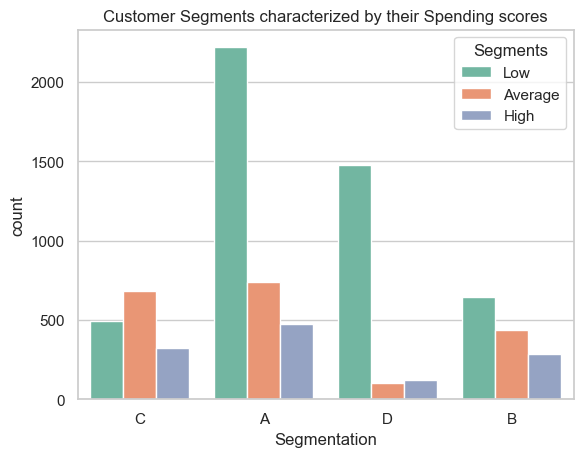

In [40]:
sns.countplot(hue='Spending_Score', x='Segmentation', data=train)
plt.title('Customer Segments characterized by their Spending scores')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Segments')
plt.show()

Most of customers in segment A have low spending score.

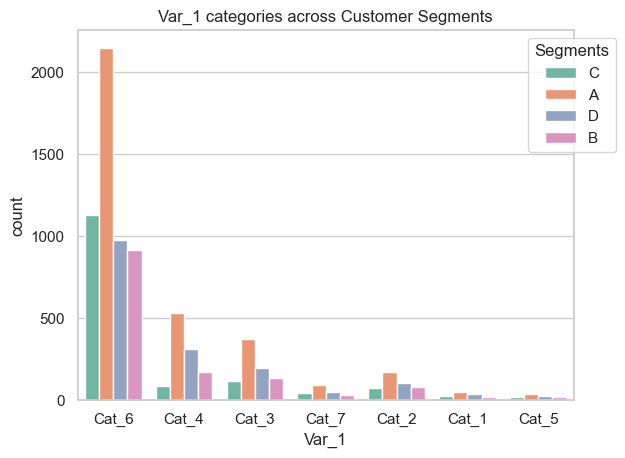

In [41]:
#Var_1 across Customer segments
sns.countplot(x='Var_1', hue='Segmentation', data=train)
plt.title('Var_1 categories across Customer Segments')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), title='Segments')
plt.show()

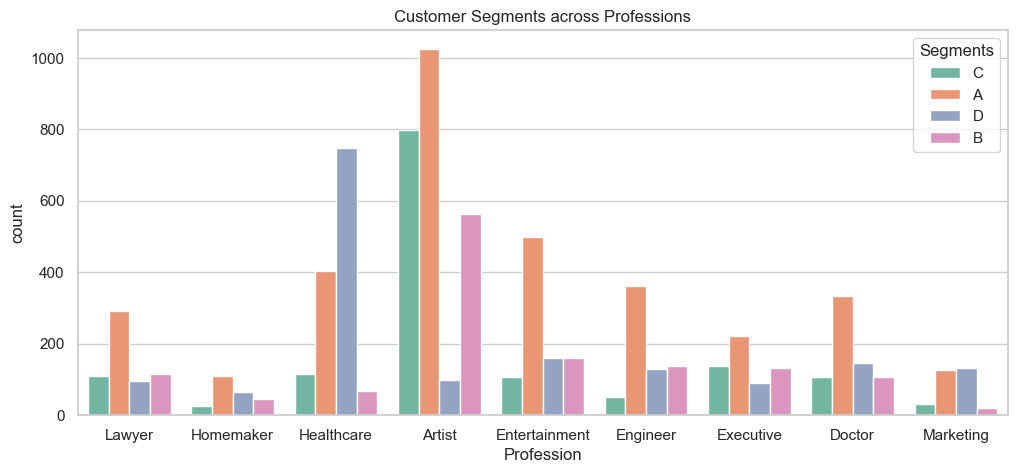

In [42]:
#Var_1 across Customer segments
plt.figure(figsize=(12,5))
sns.countplot(x='Profession', hue='Segmentation', data=train)
plt.title('Customer Segments across Professions')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Segments')
plt.show()

* Analyzing the Relationship Between Age, Work Experience, Family Size, and Spending Score Across Customer Segments

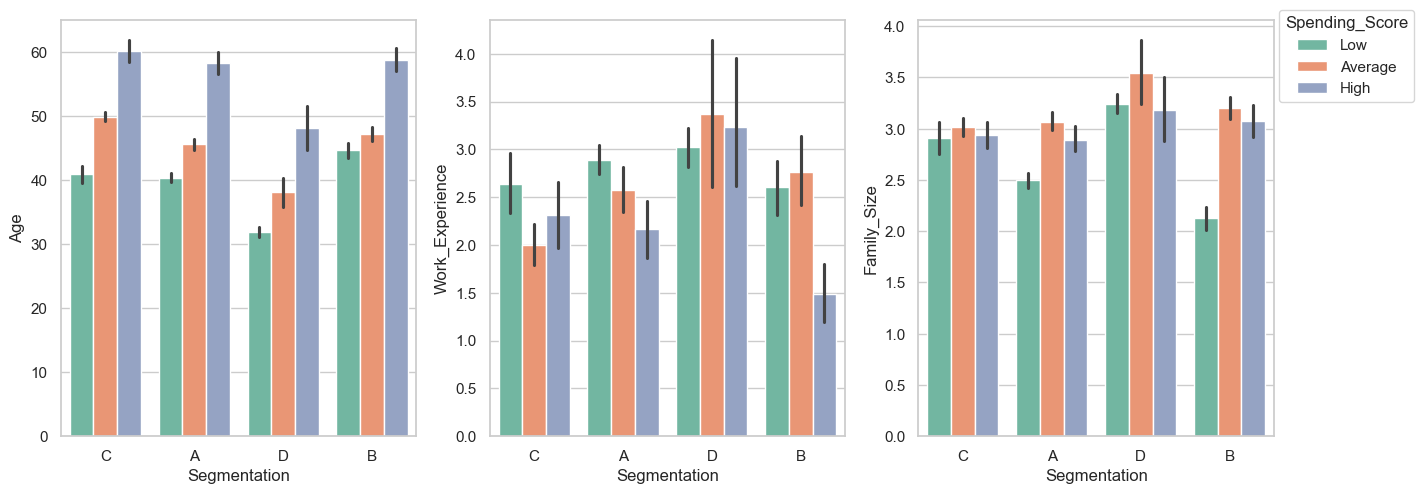

In [43]:
# Displaying the distribution of the different numerical features as a Grid
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.barplot(x=target, y=train[col], data=train, hue='Spending_Score', ax=axes[i])
    axes[i].legend_.remove()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), title='Spending_Score')
# Adjust layout
plt.tight_layout()
plt.show()

* Relationship between Spending_Score, Family_Size and Marital Status




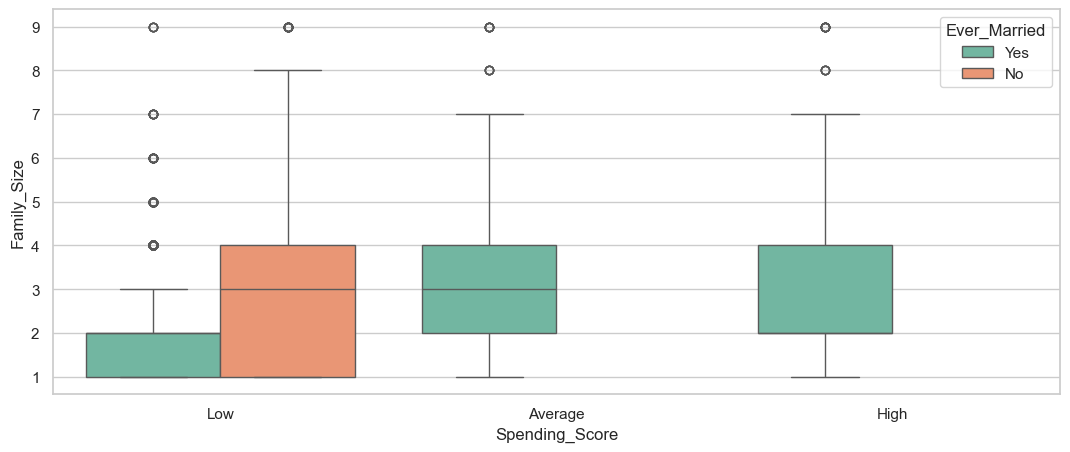

In [44]:
plt.figure(figsize=(13,5))
sns.boxplot(x='Spending_Score', y ='Family_Size', data=train, hue='Ever_Married')
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

All not married customers in the dataset have low average spending score and belong at average to small families composed of 3 persons. Average and high spending customers are exclusively married persons with family size ranging from 2 to 4.

* Relationship between Profession, Spending_Score and Age

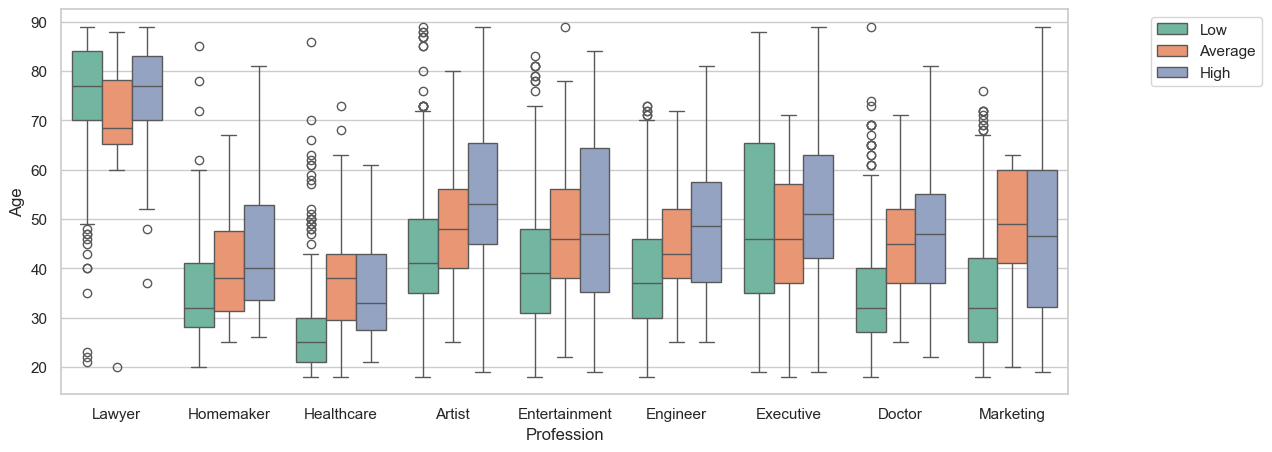

In [45]:
plt.figure(figsize=(13,5))
sns.boxplot(x='Profession', y ='Age', data=train, hue='Spending_Score')
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

* Correlations and heatmaps of different groups of features

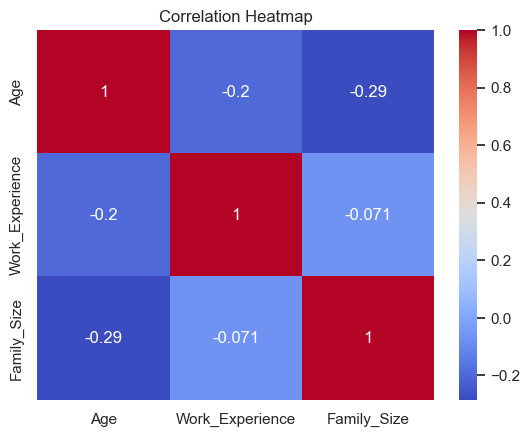

In [46]:
# Compute the correlation matrix between numerical variables
corr = train[['Age', 'Work_Experience', 'Family_Size']].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
#function to compute the correlation of two categorical variables according to Cramer's V method
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


#Function to compute and plot the correlation of categorical variables
def plot_category_corr_matrix(data, cat_cols) :
  # Initialize the matrix
  cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_columns), len(cat_columns))), index=cat_columns, columns=cat_columns)

  # Fill the matrix with Cramér's V values
  for col1 in cat_columns:
      for col2 in cat_columns:
          cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1],data[col2])

  plt.figure(figsize=(10, 8))
  sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
  plt.title("Cramér's V Correlation Matrix")
  plt.show()


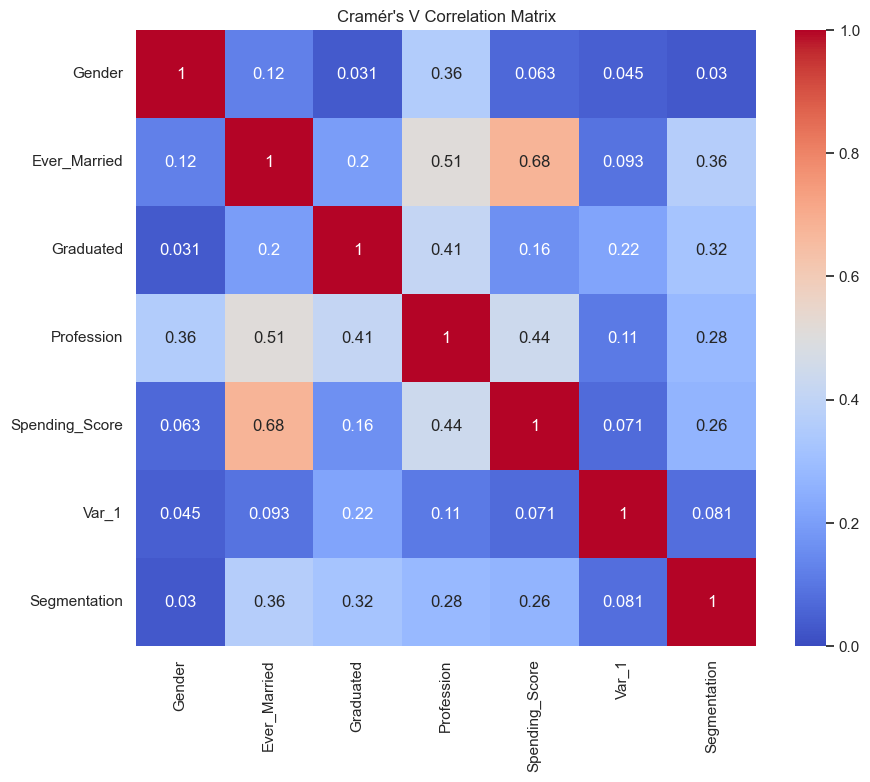

In [49]:
# Plotting the Heatmap of categorical features correlation matrix
plot_category_corr_matrix(train, cat_columns.append('Segmentation'))

* The Strongest Correlations:

  - Ever_Married and Spending_Score (0.68): This indicates a strong association between marital status and spending score. It suggests that whether a customer is married or not has a significant impact on their spending behavior.
  - Ever_Married and Profession (0.51): This suggests a strong correlation between marital status and profession. Marital status seems to be related to the type of profession.
* Correlations with our Target Variable: 'Segmentation'

 - The variables Ever_Married (0.36), Graduated (0.32), Profession (0.28), and Spending_Score (0.26) show moderate correlations with the target variable 'Segmentation'. These variables are likely significant predictors of the segmentation and should be considered carefully in the modeling process.
 - Gender (0.03) and Var_1 (0.081) have weak correlations with 'Segmentation', suggesting they might be less important in determining customer segments.

Overall, the heatmap reveals that marital status (Ever_Married), education level (Graduated), profession, and spending score are the most influential variables in customer segmentation, while gender and Var_1 appear to have minimal impact.

# Task 3: In deep analysis of missing data

Handling missing data is a crucial step in data preprocessing. We will start by examining the nature of the missing data, then visualize their distribution and  finally inspect the dependancy between variables with missing data and the other variables. These steps will help us choose the best imputation strategy by considering the nature of each variable. We will particularly try to figure out  whether the missing data are:

- Missing Completely at Random (MCAR): The missing values are unrelated to any other variable.
- Missing at Random (MAR): The missing values are related to other observed variables.
- Missing Not at Random (MNAR): The missing values are related to the unobserved values.

The imputation strategy depends on the collected information.


## 3.1 Analysis of the missing data

In [50]:
#count of rows with at least one missing value
rows_missing_value=train[train.isna().sum(axis=1)>=1].shape[0]
print(f"Number of rows with at least one missing value is {rows_missing_value}, this represents {rows_missing_value*100/train.shape[0]:.2f}% of the overall examples in the dataset")

Number of rows with at least one missing value is 1394, this represents 17.42% of the overall examples in the dataset


In [51]:
#The distribution of missing values across variables
missing_data_stats=train.isna().sum().reset_index()
missing_data_stats=missing_data_stats.rename(columns={0:'number_missing_values'})
missing_data_stats['percent_missing_values']=round((missing_data_stats['number_missing_values']*100)/train.shape[0], 2)
missing_data_stats.sort_values('number_missing_values', ascending=False)

,index,number_missing_values,percent_missing_values
6,Work_Experience,803,10.03
8,Family_Size,337,4.21
2,Ever_Married,134,1.67
5,Profession,127,1.59
9,Var_1,81,1.01
4,Graduated,74,0.92
0,ID,0,0.00
1,Gender,0,0.00
3,Age,0,0.00
7,Spending_Score,0,0.00


From the above table and plot about the missing values in the dataset, we can draw some significant conclusions:
* **Low Percentage of Missing Values in Most Columns**: 'Ever_Married', 'Graduated', 'Profession', and 'Var_1' have a relatively low percentage of missing values (less than 2%). These can be easily imputed or handled without significant impact on the dataset.

* **Moderate Missing Values in Family_Size**: This column has 4.15% missing values. While not critical, this percentage is higher and might need more thoughtful imputation methods.

* **Significant Missing Values in Work_Experience**: The Work_Experience column has the highest percentage of missing values at 10.28%. This requires special attention, as the missing values could affect the analysis and model performance if not properly addressed.

Considering the previous results, we choose to apply specific missing data imputation strategy for each column, based on its characteristics. We, first, need to collect more insights about these data. That's why, we will conduct further analysis of the missing data using chi-squared test of independance.

## 3.2 Visualizing the distribution of missing data using Missingo package

[Missingno](https://joss.theoj.org/papers/10.21105/joss.00547) is a Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe.

Below, we are plotting the matrix plot from Missingno package. Lines in white in each column stand for missing values.

<Axes: >

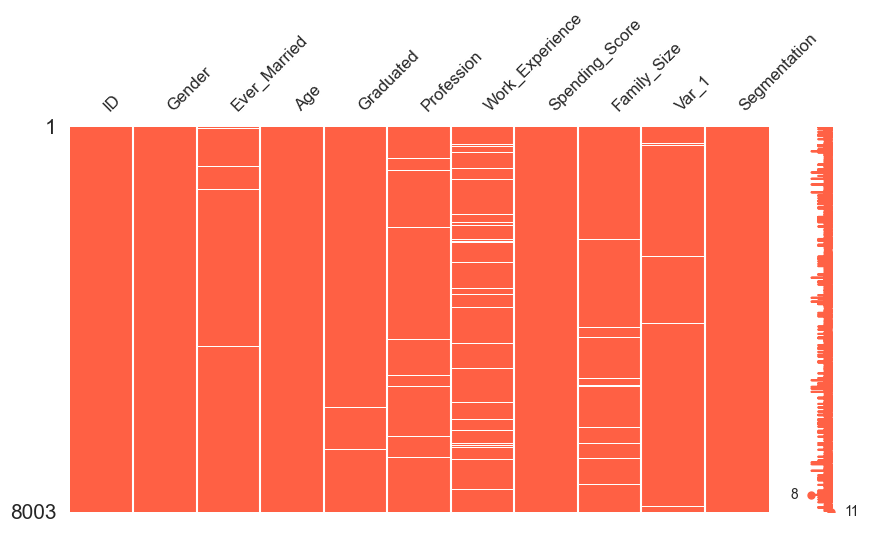

In [52]:
mno.matrix(train, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))

From the above plot, we cannot identify a specific pattern in the distribution of the missing data. There is no visual evidence of correlations between the missing data across different variables, except for a few instances where multiple values appear to be missing simultaneously. Newt, we will focus on variables with the highest number of missing data (Family_Size, Work_Experience) and visualize their missing data.



**Visualizing the missing values in 'Family_Size' across segments and marital status**

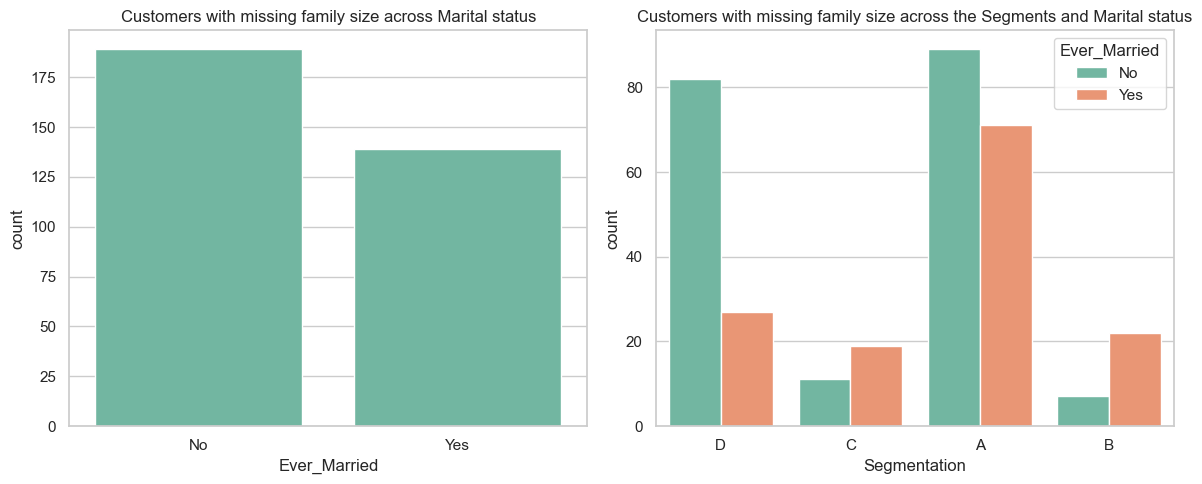

In [53]:
# Filter rows where Family_Size is missing
missing_fam = train[train['Family_Size'].isna()]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(missing_fam, x='Ever_Married', ax=axes[0])
axes[0].set_title('Customers with missing family size across Marital status')

sns.countplot(missing_fam, x='Segmentation', hue='Ever_Married', ax=axes[1])
axes[1].set_title('Customers with missing family size across the Segments and Marital status')

plt.tight_layout()
plt.show()

From the above plot, we observe that customers from different segments have missing values for family size, regardless of their marital status.

**Analysing the missing values in Work_Experience**

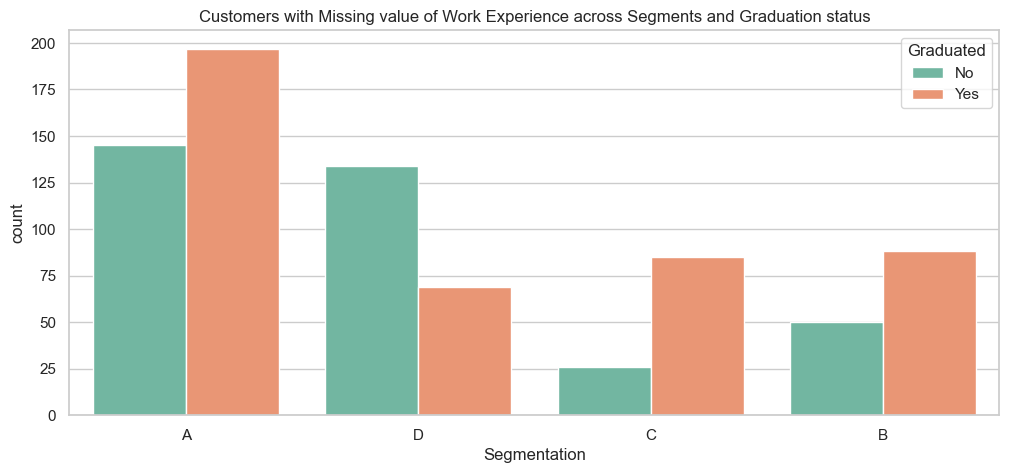

In [54]:
# Filter rows where Work_Experience is missing
missing_work_exp = train[train['Work_Experience'].isna()]
#We will visually inspect the relationships between the missing values of Work Experience, our target 'Segmentation' and other variables
plt.figure(figsize=(12,5))
sns.countplot(missing_work_exp, x=target, hue='Graduated')
plt.title('Customers with Missing value of Work Experience across Segments and Graduation status')
plt.show()

Similarly to case of missing 'Family_size', we observe from the above plot that customers from different segments have missing values for 'Work_Experience', regardless of their Graduation status. We will further analysis the distribution of missing 'Work_Experience' across the different 'Profession' categories.  

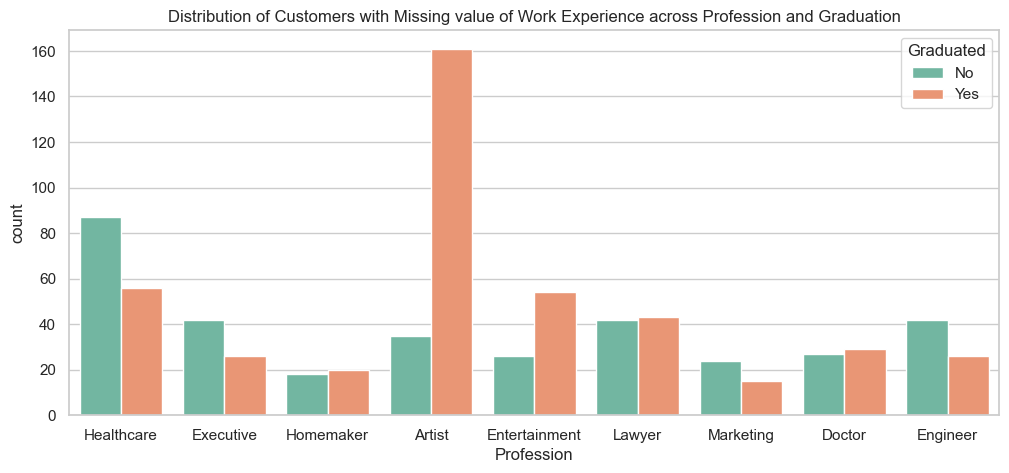

In [55]:
#We will visually inspect the relationships between the missing values of Work Experience and other semantically related variables: Profession, Graduation
plt.figure(figsize=(12,5))
sns.countplot(missing_work_exp, x='Profession', hue='Graduated' )
plt.title('Distribution of Customers with Missing value of Work Experience across Profession and Graduation')
plt.show()

From the above plot, we can draw two key insights:
* Every professional category contains missing values for work experience, indicating that this issue is widespread in the dataset and not confined to specific category of professions, nor a specific 'Segment' of customers.

* **Suspicious Graduation Status**: A significant number of customers with professions such as Engineer, Doctor, and Lawyer are marked in the dataset as 'Not Graduated.' This seems unusual and potentially erroneous, as these professions typically require advanced degrees. We have further inspected the 'Graduation' status across different profession categories which have assigned work experience. The results are plotted in the below figure.

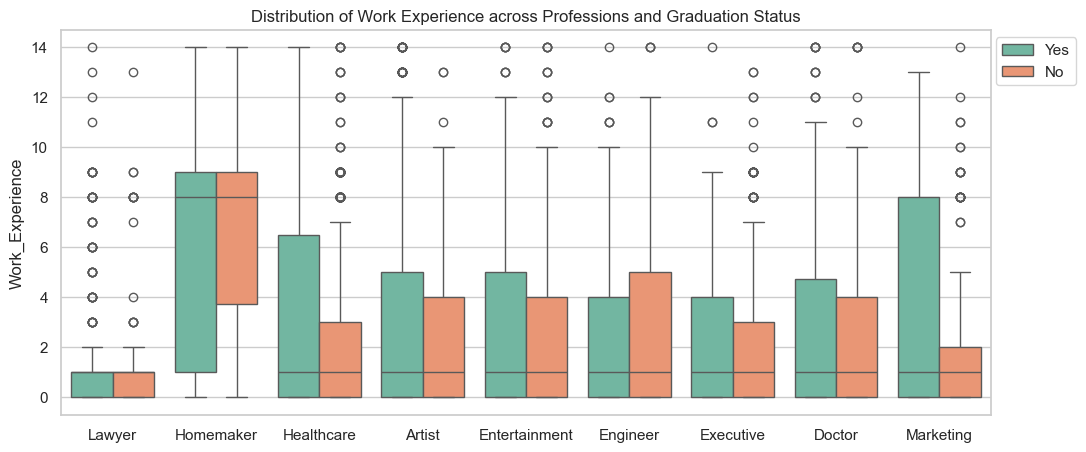

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(train, x='Profession', y='Work_Experience', hue='Graduated' )
plt.title('Distribution of Work Experience across Professions and Graduation Status')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xlabel('')
plt.show()

**Observations**: Upon analysing the above plots, it becomes evident that customers labeled as having professions typically associated with advanced degrees, such as Doctor, Engineer, Lawyer, Executive and Healthcare, are paradoxically marked as 'Not Graduated' in the dataset, even when possessing assigned values for work experience.

 => **This observation strongly suggests the presence of inaccuracies within the 'Graduation' column.**

## 3.2 Inspecting the dependancy between variables with missing data and other variables




We will conduct the Chi-squared test of independence to examine the relationships between missing data in various variables and the other variables in our dataset. The Chi-square test allows us to statistically evaluate the independence between the presence of missing values in one variable and the values of another variable. This test provides a more objective and quantitative measure of dependency, which is crucial for identifying if the missing data mechanism is one of these categories : MACR, MAR or MNAR  and thus, to formulate a more informed and accurate imputation strategy based on statistical evidence.

**Chi-square test description** more information about this test could be found [here](https://www.jmp.com/en_au/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html).

* The Null Hypothesis (H0) for the chi-square test of independence states that there is no association between the two variables. In other words, it suggests that the variables are independent of each other, meaning that the distribution of one variable does not depend on the distribution of the other variable.


The following function computs the contingency matrix for a couple of variables, then conduct the Chi-square test and return the p-value. The results of the Chi-square tests are presented as "Yes" or "No" in the **rejection** DataFrame, indicating whether the null hypothesis of independence is rejected (Yes) or not rejected (No) at the 0.05 significance level.

**For example**: If *rejection.loc['Ever_Married', 'Gender']* is "Yes", it means that there is a significant association between the missingness of the 'Ever_Married' column and the values of the 'Gender' column, suggesting the missing data in 'Ever_Married' is not MCAR.

In [57]:
def chi2_test_independance(df, col_miss, col) :
  # Create a contingency table
  contingency_table = pd.crosstab(df[col], df[col_miss].isnull())
  # Perform the chi-square test
  chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
  return p_value

def chi2_test_missingness_dependancy(df, col_missing, others):
  # Initialize an empty DataFrame to store results
  rejection = pd.DataFrame(index=col_missing, columns=others)
  for col_miss in col_missing :
    for col in others :
      if( col_miss != col ) :
        p_value = chi2_test_independance(df, col_miss, col)
        # Store p-value in result DataFrame
        rejection.loc[col_miss, col] = ('Yes' if p_value < 0.05 else 'No')
      else :
        rejection.loc[col_miss, col] = np.nan
  return rejection

In [58]:
#Columns with missing data
col_missing_values= ['Ever_Married', 'Graduated', 'Profession', 'Family_Size', 'Work_Experience', 'Var_1']
#Columns to iterate over
cols=list(train.columns)
cols.remove('ID')

rejection = chi2_test_missingness_dependancy(train, col_missing_values, cols)
rejection

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Ever_Married,Yes,NaN,No,Yes,Yes,No,Yes,No,Yes,Yes
Graduated,No,No,Yes,NaN,No,Yes,No,No,Yes,No
Profession,No,No,No,Yes,NaN,No,No,No,Yes,Yes
Family_Size,Yes,Yes,No,Yes,Yes,Yes,Yes,NaN,Yes,Yes
Work_Experience,No,No,No,Yes,Yes,NaN,Yes,No,Yes,Yes
Var_1,No,No,No,No,No,No,No,No,NaN,No


**Observations**:
- **Var_1**: The missingness in 'Var_1' is not significantly related to any other variable. This suggests that the missing data is likely **Missing Completely at Random (MCAR**). Simpler imputation methods, such as using the most frequent value, may be sufficient.
- **Family_Size**: The missingness in this variable is significantly dependent on almost all other variables, except for 'Age'. This suggests that the missing data is likely Missing at Random (**MAR**). A sophisticated imputation strategy, considering multiple features, is necessary to handle the missing values of this variable.
- **Ever_Married**: It has also high dependencies with other variables. This extensive dependency indicates that the missing data is **MAR**. Imputation for 'Ever_Married' should consider its relationship with other variables or maintain the information of missingness by adding the new category "Unknow".
- **Graduated, Profession, Work_Experience**: The missingness in these variables shows less dependencies with other variables. However, we still consider that their missing data is likely **MAR**. Therefore, imputing these variables might benefit from considering the values of other features.
- We can also notice that there is no significant association between the missingness of 'Graduated' and 'Var_1' with the target variable 'Segmentation', suggesting that the missing values in these variables are likely missing completely at random with respect to customer segments. This missingness is unlikely to bias our results or predictions related to customer segmentation. Hence, we can proceed with any imputation strategy that is suitable for our dataset.

Overall, the Chi-squared test results indicate various degrees of dependency between the missingness of specific variables and other features, helping classify the missingness as either MCAR or MAR. Variables like 'Ever_Married', 'Family_Size', and 'Work_Experience' exhibit significant dependencies, suggesting that advanced imputation methods like iterative imputation, which can leverage multiple features, are appropriate. In contrast, 'Var_1' shows no significant dependencies, indicating that simpler imputation methods are adequate.



## 3.2 Data imputation strategy

Based on our previous analysis, we have decided on the following imputation strategy, which considers the specific characteristics of data missingness in the different variables of our dataset:

1. **Variable 'Var_1'**:
    - **Missing Data**: Less than 1%, categorical features.
    - **Missingness Type**: Missing Completely at Random (MCAR).
    - **Imputation Strategy**: Impute missing values by replacing them with the most frequent value (the mode) of this variable.

2. **Variables 'Ever_Married' and 'Profession'**:
    - **Missing Data**: Less than 2%, categorical features.
    - **Missingness Type**: Missing at Random (MAR).
    - **Imputation Strategy**: The absence of values in these variables may stem from the lack of suitable categories that accurately capture individuals' situations at the time of data collection. For example, individuals who are in a relationship but not formally married or those who are unemployed might not find appropriate categories in the dataset. Hence, we decided to create a new category by treating missing values as a separate case. Encode missing values as 'Unknown' to preserve the information that the value was missing.

3. **Variable 'Graduated'**:
    - **Imputation Strategy**: Drop this column due to inexplicable inaccuracies which may negatively affect the performance of our predictive model.

4. **Variables 'Family_Size' and 'Work_Experience'**:
    - **Missing Data**: Medium to high.
    - **Missingness Type**: Potentially Missing at Random (MAR).
    - **Imputation Strategy**: Apply Iterative Imputation, which considers the values of other variables to fill the missing data. Further explanation about the Iterative Imputation algorithm in Scikit-learn can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).

Next, we will test our imputation strategy by applying it step-by-step and inspecting the resulting dataset. Finally, we will consolidate all the steps into one preprocessing pipeline.

In [59]:
df_cleaned= train.copy()

In [60]:
#Imputing the missing 'Var_1' values with the mode value of this variable
df_cleaned['Var_1'].fillna(df_cleaned['Var_1'].mode()[0], inplace=True)

In [61]:
#Imputing the missing values by creating new category
df_cleaned['Ever_Married'] = df_cleaned['Ever_Married'].fillna('Unknown')
df_cleaned['Profession'] = df_cleaned['Profession'].fillna('Unknown')

In [62]:
#Dropping the 'Graduation' and 'ID' columns
df_cleaned.drop(['Graduated'], axis=1, inplace=True)

In [70]:
#Iterative imputation of 'Family_size' and Work_Experience
iterative_imputer_cols = ['Work_Experience', 'Family_Size']

# ColumnTransformer to apply the iterative imputer
iterative_imputer = ColumnTransformer(
    transformers=[
        ('iterative_imputer', IterativeImputer(), iterative_imputer_cols)
    ],
    remainder='passthrough',   # This will leave the other columns values unchanged
    verbose_feature_names_out=False #The columns names unchanges
)
iterative_imputer.set_output(transform="pandas") #output as pandas dataframe

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', iterative_imputer)
])

# Fit and transform the data
df_cleaned = pipeline.fit_transform(df_cleaned)

In [71]:
df_cleaned.shape

(8003, 10)

In [72]:
df_cleaned.isna().sum()

Work_Experience    0
Family_Size        0
ID                 0
Gender             0
Ever_Married       0
Age                0
Profession         0
Spending_Score     0
Var_1              0
Segmentation       0
dtype: int64

In [73]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8003 entries, 0 to 8002
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Work_Experience  8003 non-null   float64
 1   Family_Size      8003 non-null   float64
 2   ID               8003 non-null   int64  
 3   Gender           8003 non-null   object 
 4   Ever_Married     8003 non-null   object 
 5   Age              8003 non-null   int64  
 6   Profession       8003 non-null   object 
 7   Spending_Score   8003 non-null   object 
 8   Var_1            8003 non-null   object 
 9   Segmentation     8003 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 625.4+ KB


In [74]:
df_cleaned.describe(include='object').transpose()

,count,unique,top,freq
Gender,8003,2,Male,4383
Ever_Married,8003,3,Yes,4614
Profession,8003,10,Artist,2488
Spending_Score,8003,3,Low,4835
Var_1,8003,7,Cat_6,5249
Segmentation,8003,4,A,3433


In [75]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Work_Experience,8003.0,2.660821,3.253748,0.0,0.0,1.000000,4.0,14.0
Family_Size,8003.0,2.852873,1.499926,1.0,2.0,2.909963,4.0,9.0
ID,8003.0,463504.731601,2606.542763,458982.0,461251.0,463512.000000,465781.5,467974.0
Age,8003.0,43.461077,16.753915,18.0,30.0,40.000000,53.0,89.0


In [76]:
cat_columns

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

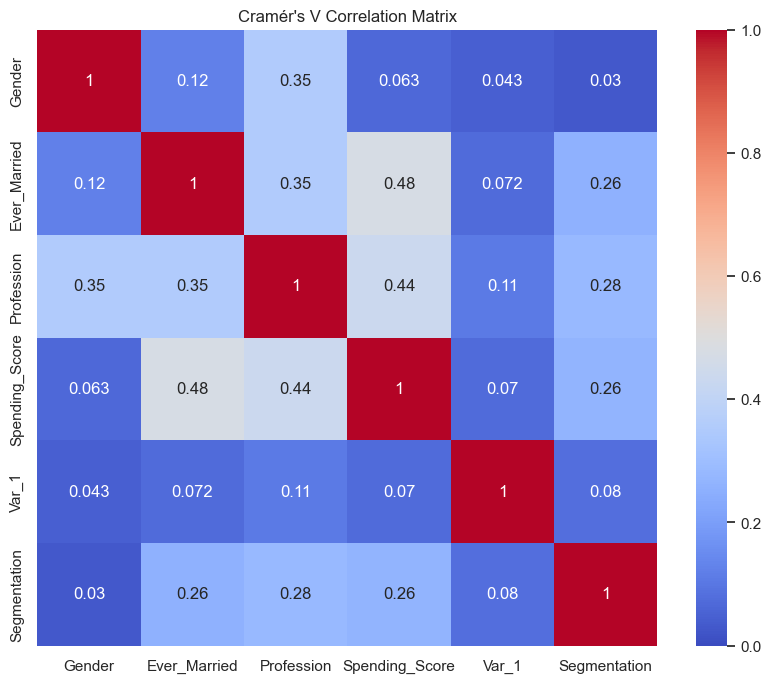

In [77]:
# Plotting the Heatmap of categorical features correlation matrix
plot_category_corr_matrix(df_cleaned, cat_columns.remove('Graduated'))

### Conclusion of Data Science Work Part 1: EDA and Data Cleaning

In this notebook, we explored the Customer Segmentation dataset and derived several key insights, which are summarized as follows:

- **Problem Definition**: The objective of this project is to train a machine learning model to classify customers into existing segments based on the provided features. Specifically, we will be tackling a multi-class classification problem. Our target variable, 'Segmentation', is categorical with four possible values representing customer segments: A, B, C, and D.
  
- **Testing Data Imbalance**: The provided test data lacks diversity in the target variable, with all examples belonging to a single customer segment class: A. This dataset does not represent all classes proportionally and is inadequate for assessing the model's generalization ability across all customer segments. Therefore, we decided to merge the provided training and testing data and create a new split for training and testing sets.
  
- **Class Imbalance**: In the new training dataset, we identified a class imbalance issue, with one dominant class (A) representing almost 43% of all examples.
  
- **Exploratory Data Analysis (EDA)**: The EDA did not reveal distinctive characteristics for different customer segments, except for segment A. Customers in segment A are primarily married males, aged between 30 and 50, with less than six years of experience, who are graduates with a low spending score.
  
- **Correlation Analysis**: We created a correlation heatmap between categorical variables using Cramér's V method. The heatmap revealed that marital status (Ever_Married), education level (Graduated), profession, and spending score are the most influential variables in customer segmentation, while gender and Var_1 appear to have minimal impact.
  
- **Missing Data Analysis**: The analysis of missing data allowed us to classify variables with missing values into one of the following categories: MAR (Missing At Random), MCAR (Missing Completely At Random), and MNAR (Missing Not At Random). This classification provided sufficient insights to define a specific missing data imputation strategy for each column, based on its characteristics and relationships with other variables.

These findings lay a strong foundation for the subsequent phases of our project, ensuring that our data is well-prepared for modeling and that we have a clear understanding of the factors influencing customer segmentation.
